# Esse notebook tem o objetivo de mostrar a criação de uma rede neural utilizando Keras e ajustar alguns parâmetros como por exemplo Pesos e Bias, para melhorar a performance do modelo.

In [ ]:
#importando as bibliotecas necessárias
from tensorflow import keras
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

Para este exemplo, vamos utilizar um dataset do próprio Keras. Uma base com imagens de roupas

In [ ]:
# Faschion MNIST é um conjunto de imagens de roupas
imagens = keras.datasets.fashion_mnist
(treino_imagens, treino_labels), (teste_imagens, teste_labels) = imagens.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
#vendo o tamanho dos datasets após divisão entre treino e teste - e analisando a base
print(treino_imagens.shape)  #tamanho
print(teste_imagens.shape) #tamanho
print(np.unique(treino_labels)) #features unicas

(60000, 28, 28)
(10000, 28, 28)
[0 1 2 3 4 5 6 7 8 9]


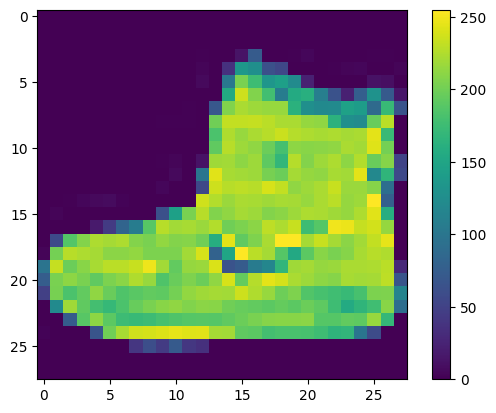

In [ ]:
total_de_classificacoes = 10
nomes_de_classificacoes = ['Camiseta', 'Calça', 'Pullover',
                           'Vestido', 'Casaco', 'Sandália', 'Camisa',
                           'Tênis', 'Bolsa', 'Bota']

plt.imshow(treino_imagens[0])
plt.colorbar()

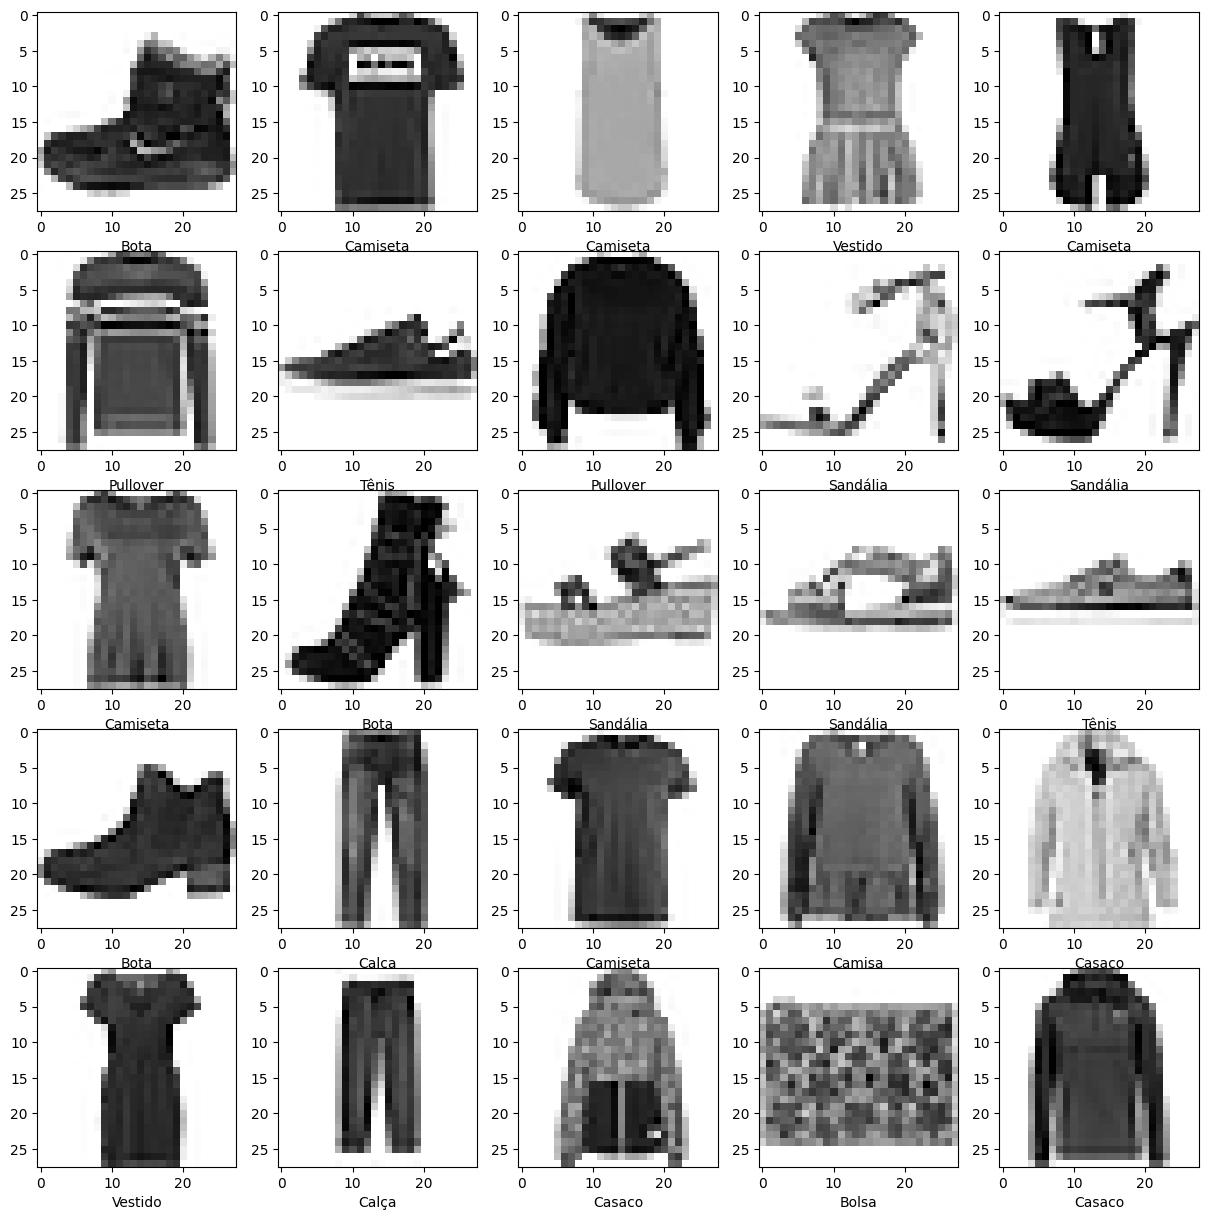

In [ ]:
#normalizando as imagens
treino_imagens = treino_imagens / float(255)
teste_imagens = teste_imagens / float(255)

#plotando as imagens
plt.figure(figsize=(15,15))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.imshow(treino_imagens[i], cmap='binary')
  plt.xlabel(nomes_de_classificacoes[treino_labels[i]])  # nomeando as roupas

In [ ]:
#criando a RNA
modelo = keras.Sequential([
                            keras.layers.Flatten(input_shape=(28,28)),
                            keras.layers.Dense(256,activation=tf.nn.relu),
                            keras.layers.Dense(28,activation=tf.nn.softmax),
])

#compilando a RNA com os parametros
modelo.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
#vendo um resumo do modelo
modelo.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 256)               200960    
                                                                 
 dense_3 (Dense)             (None, 28)                7196      
                                                                 
Total params: 208156 (813.11 KB)
Trainable params: 208156 (813.11 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
#treinando o modelo e guardando o histórico para plotar no gráfico
modelo.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])
historico = modelo.fit(treino_imagens, treino_labels, epochs=12, validation_split=0.2)

Epoch 1/12
1500/1500 [==============================] - 6s 4ms/step - loss: 0.5435 - accuracy: 0.8095 - val_loss: 0.4200 - val_accuracy: 0.8512
Epoch 2/12
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3991 - accuracy: 0.8533 - val_loss: 0.3850 - val_accuracy: 0.8593
Epoch 3/12
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3634 - accuracy: 0.8654 - val_loss: 0.3541 - val_accuracy: 0.8674
Epoch 4/12
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3392 - accuracy: 0.8749 - val_loss: 0.3381 - val_accuracy: 0.8747
Epoch 5/12
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3211 - accuracy: 0.8793 - val_loss: 0.3240 - val_accuracy: 0.8813
Epoch 6/12
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3092 - accuracy: 0.8849 - val_loss: 0.3324 - val_accuracy: 0.8788
Epoch 7/12
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2986 - accuracy: 0.8879 - val_loss: 0.3261 - val_accuracy:

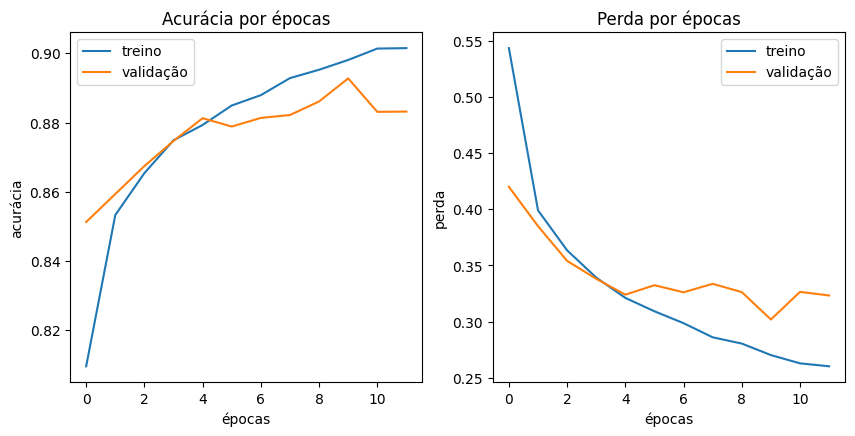

In [ ]:
#plotando o histórico de acurácia e perda
plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia por épocas')
plt.xlabel('épocas')
plt.ylabel('acurácia')
plt.legend(['treino', 'validação'])

plt.subplot(2,2,2)
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perda por épocas')
plt.xlabel('épocas')
plt.ylabel('perda')
plt.legend(['treino', 'validação'])

In [ ]:
#avaliando os resultados do treinamento
teste_loss, teste_acu = modelo.evaluate(teste_imagens, teste_labels)

print(teste_loss)
print(teste_acu)

313/313 [==============================] - 1s 2ms/step - loss: 0.3485 - accuracy: 0.8762
0.34854093194007874
0.8762000203132629


Modificando parâmetros da rede - Tunning

In [ ]:
#Vendo os atuais parâmetros do modelo
modelo.get_config()

In [ ]:
#Vendos os pesos e viéses
pesos_camadas = modelo.layers[1].get_weights()[0]
bias_camadas  = modelo.layers[1].get_weights()[1]
print(f"Qtde de Pesos: {pesos_camadas.shape} Pesos: {pesos_camadas}")
print(f"Qtde de Bias (Viéses): {bias_camadas.shape} Bias: {bias_camadas}")

Qtde de Pesos: (784, 256) Pesos: [[-4.00595590e-02  9.95106995e-03  5.20162433e-02 ... -6.34357333e-03
   2.39575207e-02 -5.88213503e-02]
 [-2.66422778e-02  1.38504505e-02 -2.39882134e-02 ...  5.71026057e-02
  -6.70759529e-02  5.04763275e-02]
 [-6.35520145e-02 -4.15350385e-02 -3.73416767e-02 ... -6.03799336e-02
   4.07166779e-04  4.32107002e-02]
 ...
 [ 5.18634915e-05  4.47789580e-02  6.22850209e-02 ...  1.69589147e-02
   3.71464416e-02  5.91978729e-02]
 [ 6.62950426e-03 -3.16403806e-04  5.24449348e-02 ... -7.96666741e-03
  -2.84709036e-04 -7.98394531e-03]
 [-3.83207686e-02 -3.41766439e-02 -5.81156164e-02 ... -4.22824174e-03
   6.30202293e-02 -3.06165554e-02]]
Qtde de Bias (Viéses): (256,) Bias: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.

In [ ]:
# mudando os pesos e bias iniciais para zero
bias_zerados  = np.zeros((256,))
pesos_zerados = np.zeros((784, 256))
modelo.layers[1].set_weights(
    [pesos_zerados, bias_zerados]
)

In [ ]:
# mudando os pesos e bias iniciais para um nr aleatorio
bias_zerados  = np.random.rand((256))
pesos_zerados = np.random.rand(784, 256)
modelo.layers[1].set_weights(
    [pesos_zerados, bias_zerados]
)

In [ ]:
# Dropout é uma técnica que elimina nós (neurônios) aleatoriamente da rede. Ele tem um efeito de regularização,
# pois os nós restantes devem se adaptar para compensar o espaço dos nós removidos.
# criando a RNA
modelo = keras.Sequential([
                            keras.layers.Flatten(input_shape=(28,28)),
                            keras.layers.Dense(256,activation=tf.nn.relu),
                            keras.layers.Dropout(0.2),
                            keras.layers.Dense(28,activation=tf.nn.softmax),
])

#compilando a RNA com os parametros
modelo.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
#Adicionando learning rate
adam = keras.optimizers.Adam(lr=0.002)

#outros fits
parando_cedo = [keras.callbacks.EarlyStopping(monitor='val_loss'),
                keras.callbacks.ModelCheckpoint(filepath='melhor_modelo.hdf5',
                                               monitor='val_loss', save_best_only=True)]